## Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
merged_train_unique_medclms= pd.read_csv('/content/drive/Shareddrives/Humana-Mays-2023-DataRX-Wizards/Humana-Mays-2023 Dataset/003_Dataset Merged/merged_train_unique_medclms.csv')
merged_train_unique_rxclms= pd.read_csv('/content/drive/Shareddrives/Humana-Mays-2023-DataRX-Wizards/Humana-Mays-2023 Dataset/003_Dataset Merged/merged_train_unique_rxclms.csv')

merged_holdout_unique_medclms=pd.read_csv('/content/drive/Shareddrives/Humana-Mays-2023-DataRX-Wizards/Humana-Mays-2023 Dataset/003_Dataset Merged/merged_holdout_unique_medclms.csv')
merged_holdout_unique_rxclms=pd.read_csv('/content/drive/Shareddrives/Humana-Mays-2023-DataRX-Wizards/Humana-Mays-2023 Dataset/003_Dataset Merged/merged_holdout_unique_rxclms.csv')

In [ ]:
print('The dataset shapes after cleaning and preprocessed are:')
print(f"merged_train_unique_medclms: {merged_train_unique_medclms.shape}")
print(f"merged_train_unique_rxclms: {merged_train_unique_rxclms.shape}")
print('')
print(f"merged_train_unique_medclms: {merged_holdout_unique_medclms.shape}")
print(f"merged_train_unique_rxclms: {merged_holdout_unique_rxclms.shape}")

The dataset shapes after cleaning and preprocessed are:
merged_train_unique_medclms: (1232, 19)
merged_train_unique_rxclms: (1232, 21)

merged_train_unique_medclms: (420, 18)
merged_train_unique_rxclms: (420, 20)


In [ ]:
def print_bold(text):
    print("\033[1m" + text + "\033[0m")

def show_dataset_detail(dataset):
    print_bold("The shape is {}".format(dataset.shape))
    print('')
    print_bold('The missing value distribution:')
    print(dataset.isna().sum())
    print('')
    print_bold('The dypes distribution:')
    print(dataset.dtypes.value_counts())
    print('')
    for column in dataset.columns:
        if dataset[column].dtypes=='object'or dataset[column].dtypes=='O':
            print_bold('{} variable distribution'.format(column))
            print(dataset[column].value_counts())
            print('')
        else:
            unique=dataset[column].nunique()
            print_bold('{} has {} uniuqe number,Dataset #row is {}'.format(column,unique,dataset.shape[0]))
            print('')

In [ ]:
merged_train_unique_medclms.isna().sum()

therapy_id                                    0
tgt_ade_dc_ind                                0
race_cd                                      68
est_age                                      83
sex_cd                                       83
cms_disabled_ind                             83
cms_low_income_ind                           83
visit_day_and_process_day_gap               696
primary_diag_cd_letter                      696
number_of_med_claims                        696
ade_claim_proportion                        696
seizure_diagnosis_claim_proportion          696
pain_diagnosis_claim_proportion             696
fatigue_diagnosis_claim_proportion          696
nausea_diagnosis_claim_proportion           696
hyperglycemia_diagnosis_claim_proportion    696
constipation_diagnosis_claim_proportion     696
diarrhea_diagnosis_claim_proportion         696
visit_day_and_process_day_gap_median        696
dtype: int64

In [ ]:
merged_train_unique_rxclms.isna().sum()

therapy_id                                 0
tgt_ade_dc_ind                             0
race_cd                                   68
est_age                                   83
sex_cd                                    83
cms_disabled_ind                          83
cms_low_income_ind                        83
number_of_rx_claims                       72
max_tot_drug_cost_accum_amt               72
Y_mail_order_proportion                   72
Generic_ind_proportion                    72
MAINT_ind_proportion                      72
SPCL_ind_proportion                       72
ddi_ind_claim_proportion                  72
anticoag_ind_claim_proportion             72
diarrhea_treat_ind_claim_proportion       72
nausea_treat_ind_claim_proportion         72
seizure_treat_ind_claim_proportion        72
pay_day_supply_cnt_median                 72
rx_cost_median                            72
service_day_and_process_day_gap_median    72
dtype: int64

In [ ]:
merged_train_unique_medclms.columns

Index(['therapy_id', 'tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd',
       'cms_disabled_ind', 'cms_low_income_ind',
       'visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median'],
      dtype='object')

In [ ]:
merged_train_unique_rxclms.columns

Index(['therapy_id', 'tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd',
       'cms_disabled_ind', 'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median'],
      dtype='object')

## Merge

In [ ]:
temp_merged_train_unique_medclms=merged_train_unique_medclms[['therapy_id','visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median']]

In [ ]:
three_merged_train=merged_train_unique_rxclms.merge(temp_merged_train_unique_medclms, on='therapy_id', how='left')

In [ ]:
three_merged_train.shape

(1232, 33)

In [ ]:
three_merged_train.isna().sum()

therapy_id                                    0
tgt_ade_dc_ind                                0
race_cd                                      68
est_age                                      83
sex_cd                                       83
cms_disabled_ind                             83
cms_low_income_ind                           83
number_of_rx_claims                          72
max_tot_drug_cost_accum_amt                  72
Y_mail_order_proportion                      72
Generic_ind_proportion                       72
MAINT_ind_proportion                         72
SPCL_ind_proportion                          72
ddi_ind_claim_proportion                     72
anticoag_ind_claim_proportion                72
diarrhea_treat_ind_claim_proportion          72
nausea_treat_ind_claim_proportion            72
seizure_treat_ind_claim_proportion           72
pay_day_supply_cnt_median                    72
rx_cost_median                               72
service_day_and_process_day_gap_median  

### Drop columns

In [ ]:
three_merged_train=three_merged_train.drop(columns='therapy_id')

In [ ]:
three_merged_train.columns

Index(['tgt_ade_dc_ind', 'race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_pro

In [ ]:
len(three_merged_train['primary_diag_cd_letter'].value_counts())

16

## Modeling

### Split train,test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = three_merged_train.drop(columns=['tgt_ade_dc_ind'])
y = three_merged_train['tgt_ade_dc_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print('')
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (985, 31)
Shape of X_test: (247, 31)

Shape of y_train: (985,)
Shape of y_test: (247,)


### Missing value imputation

In [ ]:
X_train.isna().sum()

race_cd                                      52
est_age                                      71
sex_cd                                       71
cms_disabled_ind                             71
cms_low_income_ind                           71
number_of_rx_claims                          61
max_tot_drug_cost_accum_amt                  61
Y_mail_order_proportion                      61
Generic_ind_proportion                       61
MAINT_ind_proportion                         61
SPCL_ind_proportion                          61
ddi_ind_claim_proportion                     61
anticoag_ind_claim_proportion                61
diarrhea_treat_ind_claim_proportion          61
nausea_treat_ind_claim_proportion            61
seizure_treat_ind_claim_proportion           61
pay_day_supply_cnt_median                    61
rx_cost_median                               61
service_day_and_process_day_gap_median       61
visit_day_and_process_day_gap               555
primary_diag_cd_letter                  

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1069 to 1126
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   race_cd                                   933 non-null    float64
 1   est_age                                   914 non-null    float64
 2   sex_cd                                    914 non-null    object 
 3   cms_disabled_ind                          914 non-null    float64
 4   cms_low_income_ind                        914 non-null    float64
 5   number_of_rx_claims                       924 non-null    float64
 6   max_tot_drug_cost_accum_amt               924 non-null    float64
 7   Y_mail_order_proportion                   924 non-null    float64
 8   Generic_ind_proportion                    924 non-null    float64
 9   MAINT_ind_proportion                      924 non-null    float64
 10  SPCL_ind_proportion               

In [ ]:
X_train['sex_cd'] = X_train['sex_cd'].replace({'M': 1, 'F': 0})
X_test['sex_cd'] = X_test['sex_cd'].replace({'M': 1, 'F': 0})

# X_train['mail_order_ind'] = X_train['mail_order_ind'].map({'N': 0, 'Y': 1})
# X_test['mail_order_ind'] = X_test['mail_order_ind'].map({'N': 0, 'Y': 1})

# X_train['generic_ind'] = X_train['generic_ind'].map({'BRANDED': 1, 'GENERIC': 0})
# X_test['generic_ind'] = X_test['generic_ind'].map({'BRANDED': 1, 'GENERIC': 0})

# X_train['maint_ind'] = X_train['maint_ind'].map({'NONMAINT': 0, 'MAINT': 1})
# X_test['maint_ind'] = X_test['maint_ind'].map({'NONMAINT': 0, 'MAINT': 1})

# X_train['specialty_ind'] = X_train['specialty_ind'].map({'NONSPCL': 0, 'SPCL': 1})
# X_test['specialty_ind'] = X_test['specialty_ind'].map({'NONSPCL': 0, 'SPCL': 1})

In [ ]:
X_train.columns

Index(['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       '

primary_diag_cd_letter

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


columns_to_impute=['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median']

imputer = IterativeImputer(max_iter=10, random_state=0)
X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])
print_bold('X_train')
print(X_train.isna().sum())
print('')
print_bold('X_test')
X_test[columns_to_impute] = imputer.fit_transform(X_test[columns_to_impute])
X_test.isna().sum()

X_train
race_cd                                       0
est_age                                       0
sex_cd                                        0
cms_disabled_ind                              0
cms_low_income_ind                            0
number_of_rx_claims                           0
max_tot_drug_cost_accum_amt                   0
Y_mail_order_proportion                       0
Generic_ind_proportion                        0
MAINT_ind_proportion                          0
SPCL_ind_proportion                           0
ddi_ind_claim_proportion                      0
anticoag_ind_claim_proportion                 0
diarrhea_treat_ind_claim_proportion           0
nausea_treat_ind_claim_proportion             0
seizure_treat_ind_claim_proportion            0
pay_day_supply_cnt_median                     0
rx_cost_median                                0
service_day_and_process_day_gap_median        0
visit_day_and_process_day_gap                 0
primary_diag_cd_letter          

race_cd                                       0
est_age                                       0
sex_cd                                        0
cms_disabled_ind                              0
cms_low_income_ind                            0
number_of_rx_claims                           0
max_tot_drug_cost_accum_amt                   0
Y_mail_order_proportion                       0
Generic_ind_proportion                        0
MAINT_ind_proportion                          0
SPCL_ind_proportion                           0
ddi_ind_claim_proportion                      0
anticoag_ind_claim_proportion                 0
diarrhea_treat_ind_claim_proportion           0
nausea_treat_ind_claim_proportion             0
seizure_treat_ind_claim_proportion            0
pay_day_supply_cnt_median                     0
rx_cost_median                                0
service_day_and_process_day_gap_median        0
visit_day_and_process_day_gap                 0
primary_diag_cd_letter                  

In [ ]:
def map_race_cd(value):
    if value > 1.5 and value < 2.5:
        return 2
    elif value >0 and value < 1.5:
        return 1
    else:
        return value
X_train['race_cd'] = X_train['race_cd'].apply(map_race_cd)
X_test['race_cd'] = X_test['race_cd'].apply(map_race_cd)

binary_columns = ['sex_cd','cms_disabled_ind', 'cms_low_income_ind']

# binary_columns = ['sex_cd', 'cms_disabled_ind', 'cms_low_income_ind', 'mail_order_ind',
#                   'generic_ind', 'maint_ind', 'specialty_ind', 'ddi_ind', 'anticoag_ind',
#                   'diarrhea_treat_ind', 'nausea_treat_ind', 'seizure_treat_ind']
for column in binary_columns:
    mask = X_train[column] < 0.5
    X_train.loc[mask, column] = 0
    X_train.loc[~mask, column] = 1
for column in binary_columns:
    mask = X_test[column] < 0.5
    X_test.loc[mask, column] = 0
    X_test.loc[~mask, column] = 1


In [ ]:
columns_to_impute_check = [
    'race_cd','sex_cd','cms_disabled_ind', 'cms_low_income_ind'
]

# columns_to_impute_check = [
#     'race_cd','sex_cd', 'cms_disabled_ind', 'cms_low_income_ind','mail_order_ind', 'generic_ind',
#     'maint_ind', 'specialty_ind', 'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind',
#     'nausea_treat_ind', 'seizure_treat_ind'
# ]

In [ ]:
for column in columns_to_impute_check:
  print_bold('{}'.format(column))
  print(X_train[column].value_counts())

for column in columns_to_impute_check:
  print_bold('{}'.format(column))
  print(X_test[column].value_counts())

race_cd
1.0    600
2.0    141
4.0    115
0.0     65
5.0     34
3.0     27
6.0      3
Name: race_cd, dtype: int64
sex_cd
0.0    732
1.0    253
Name: sex_cd, dtype: int64
cms_disabled_ind
0.0    846
1.0    139
Name: cms_disabled_ind, dtype: int64
cms_low_income_ind
0.0    632
1.0    353
Name: cms_low_income_ind, dtype: int64
race_cd
1.0    126
2.0     45
4.0     37
0.0     19
3.0     10
5.0      8
6.0      2
Name: race_cd, dtype: int64
sex_cd
0.0    166
1.0     81
Name: sex_cd, dtype: int64
cms_disabled_ind
0.0    217
1.0     30
Name: cms_disabled_ind, dtype: int64
cms_low_income_ind
0.0    148
1.0     99
Name: cms_low_income_ind, dtype: int64


In [ ]:
# impute categorical variables

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['primary_diag_cd_letter']
X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])
print(X_train.isna().sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['primary_diag_cd_letter']
X_test[columns_to_impute] = imputer.fit_transform(X_test[columns_to_impute])
print(X_test.isna().sum())

race_cd                                     0
est_age                                     0
sex_cd                                      0
cms_disabled_ind                            0
cms_low_income_ind                          0
number_of_rx_claims                         0
max_tot_drug_cost_accum_amt                 0
Y_mail_order_proportion                     0
Generic_ind_proportion                      0
MAINT_ind_proportion                        0
SPCL_ind_proportion                         0
ddi_ind_claim_proportion                    0
anticoag_ind_claim_proportion               0
diarrhea_treat_ind_claim_proportion         0
nausea_treat_ind_claim_proportion           0
seizure_treat_ind_claim_proportion          0
pay_day_supply_cnt_median                   0
rx_cost_median                              0
service_day_and_process_day_gap_median      0
visit_day_and_process_day_gap               0
primary_diag_cd_letter                      0
number_of_med_claims              

### Preprocessing pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
X_train.columns

Index(['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       '

In [ ]:
numeric_columns=['est_age','visit_day_and_process_day_gap',
    'number_of_med_claims',
       'ade_claim_proportion', 'seizure_diagnosis_claim_proportion',
       'pain_diagnosis_claim_proportion', 'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median']

numeric_columns= numeric_columns+['number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median']


categorical_columns=['primary_diag_cd_letter','race_cd','sex_cd','cms_disabled_ind','cms_low_income_ind']


print('{} variables in total in X_train'.format(X_train.shape[1]))
print('{} of variables are treated as numeric'.format(len(numeric_columns)))
print('{} of variables are treated as categorical'.format(len(categorical_columns)))

31 variables in total in X_train
26 of variables are treated as numeric
5 of variables are treated as categorical


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the final pipeline for modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

print("Shape of X_train_transformed:", X_train_transformed.shape)
print("Shape of X_test_transformed:", X_test_transformed.shape)

Shape of X_train_transformed: (985, 55)
Shape of X_test_transformed: (247, 55)


### Evaluation & testset Prediction

## lightGBM

In [ ]:
from lightgbm import LGBMClassifier
accuracy= []
recall =[]
roc_auc= []
precision = []


lgbmc_5=LGBMClassifier(random_state=0,
                       scale_pos_weight=3)

lgbmc_5.fit(X_train_transformed, y_train)
            #categorical_feature = 'auto',eval_set=(X_test, y_test),feature_name='auto')


y_pred = lgbmc_5.predict(X_test_transformed)
y_pred_proba = lgbmc_5.predict_proba(X_test_transformed)[:, 1]



[LightGBM] [Info] Number of positive: 91, number of negative: 894
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4786
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.092386 -> initscore=-2.284846
[LightGBM] [Info] Start training from score -2.284846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
lgbmc_5.predict_proba(X_test_transformed)

array([[9.99612774e-01, 3.87225939e-04],
       [9.99483178e-01, 5.16822050e-04],
       [9.09444393e-01, 9.05556067e-02],
       [9.90834721e-01, 9.16527865e-03],
       [9.99486625e-01, 5.13374948e-04],
       [9.99984335e-01, 1.56646780e-05],
       [9.99523511e-01, 4.76488865e-04],
       [9.98649760e-01, 1.35023972e-03],
       [9.45298530e-01, 5.47014699e-02],
       [9.99635113e-01, 3.64887250e-04],
       [9.98302573e-01, 1.69742697e-03],
       [9.99829368e-01, 1.70632321e-04],
       [9.99977866e-01, 2.21335818e-05],
       [9.99987677e-01, 1.23225073e-05],
       [9.99981378e-01, 1.86217017e-05],
       [9.99960468e-01, 3.95316734e-05],
       [9.99969670e-01, 3.03296462e-05],
       [9.99971262e-01, 2.87377882e-05],
       [9.99763190e-01, 2.36809614e-04],
       [9.99412578e-01, 5.87422454e-04],
       [9.99743889e-01, 2.56110926e-04],
       [9.98192359e-01, 1.80764129e-03],
       [9.99969427e-01, 3.05727438e-05],
       [9.94637348e-01, 5.36265217e-03],
       [9.999907

In [ ]:
y_pred_proba

array([3.87225939e-04, 5.16822050e-04, 9.05556067e-02, 9.16527865e-03,
       5.13374948e-04, 1.56646780e-05, 4.76488865e-04, 1.35023972e-03,
       5.47014699e-02, 3.64887250e-04, 1.69742697e-03, 1.70632321e-04,
       2.21335818e-05, 1.23225073e-05, 1.86217017e-05, 3.95316734e-05,
       3.03296462e-05, 2.87377882e-05, 2.36809614e-04, 5.87422454e-04,
       2.56110926e-04, 1.80764129e-03, 3.05727438e-05, 5.36265217e-03,
       9.28976305e-06, 8.77836907e-01, 5.87394204e-04, 8.30965962e-01,
       1.23225073e-05, 6.10948783e-01, 6.31731531e-03, 2.90673861e-05,
       4.56779649e-04, 1.97111992e-03, 9.95830568e-05, 9.51819022e-01,
       1.23225073e-05, 9.64820598e-04, 1.29257663e-05, 9.48499556e-03,
       4.15144752e-05, 3.21704303e-01, 2.75013861e-05, 5.15867583e-01,
       8.63797261e-04, 6.50664694e-02, 6.15852540e-05, 6.25889588e-05,
       6.77930452e-02, 4.84023994e-05, 9.68383167e-04, 5.66471971e-04,
       1.23225073e-05, 1.76213535e-02, 1.51538883e-02, 9.70772305e-01,
      

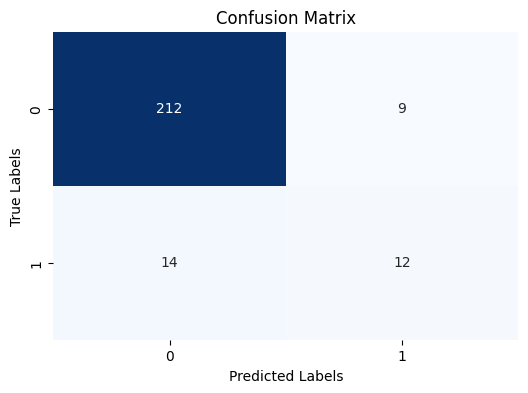

AUC Score: 0.9077619213365821
Accuracy: 0.8947368421052632
Precision: 0.9380530973451328
Recall: 0.9464285714285714
F1 Score: 0.9422222222222223


In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix

auc_score = roc_auc_score(y_test, y_pred_proba)



conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


TP, TN, FP, FN = conf_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("AUC Score:", auc_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, HalvingRandomSearchCV
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score, roc_auc_score, mean_squared_error, r2_score, balanced_accuracy_score, classification_report, ConfusionMatrixDisplay, precision_recall_curve, f1_score, auc
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, scale, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier


In [ ]:
from lightgbm import LGBMClassifier
accuracy= []
recall =[]
roc_auc= []
precision = []


lgbmc_5=LGBMClassifier(random_state=0,scale_pos_weight=3)

lgbmc_5.fit(X_train_transformed, y_train)
           #,categorical_feature = 'auto',eval_set=(X_test, y_test),feature_name='auto')

y_pred = lgbmc_5.predict(X_test_transformed)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['LightGBM_adjusted_weight_5']
result_df8 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df8

[LightGBM] [Info] Number of positive: 91, number of negative: 894
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4786
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.092386 -> initscore=-2.284846
[LightGBM] [Info] Start training from score -2.284846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Accuracy,Recall,Roc_Auc,Precision
LightGBM_adjusted_weight_5,0.9069,0.4615,0.7104,0.5714


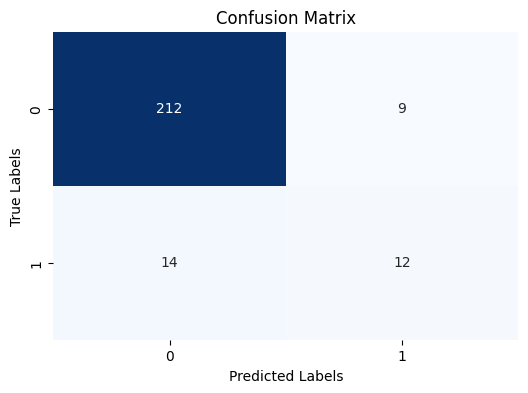

AUC Score: 0.908806126000696
Accuracy: 0.8947368421052632
Precision: 0.9380530973451328
Recall: 0.9464285714285714
F1 Score: 0.9422222222222223


In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix

auc_score = roc_auc_score(y_test, y_pred_proba)



conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


TP, TN, FP, FN = conf_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("AUC Score:", auc_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_transformed, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = logistic_model.predict(X_test_transformed)
y_pred_proba = logistic_model.predict_proba(X_test_transformed)[:, 1]

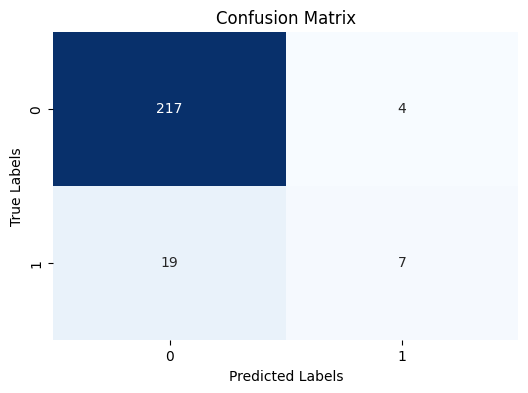

AUC Score: 0.7553080403759136
Accuracy: 0.8947368421052632
Precision: 0.9194915254237288
Recall: 0.96875
F1 Score: 0.9434782608695652


In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix

auc_score = roc_auc_score(y_test, y_pred_proba)



conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


TP, TN, FP, FN = conf_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("AUC Score:", auc_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


#### XGBClassifier


In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test_transformed)
y_pred_proba = xgb_model.predict_proba(X_test_transformed)[:, 1]

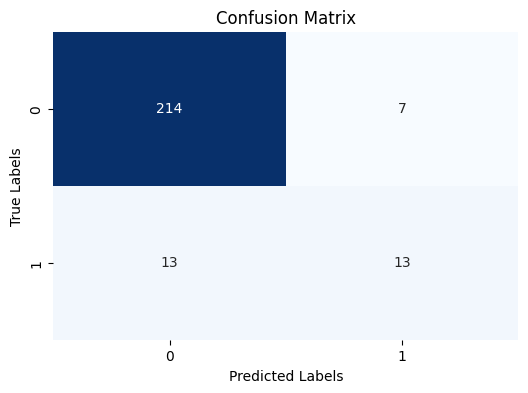

AUC Score: 0.911242603550296
Accuracy: 0.8947368421052632
Precision: 0.9427312775330396
Recall: 0.9427312775330396
F1 Score: 0.9427312775330396


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

auc_score = roc_auc_score(y_test, y_pred_proba)

conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


TP, TN, FP, FN = conf_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("AUC Score:", auc_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


In [ ]:
# pip install sha

In [ ]:
# import shap

In [ ]:
# feature_importance = xgb_model.feature_importances_

# explainer = shap.Explainer(xgb_model)
# shap_values = explainer.shap_values(X_test_transformed)

# top_n_features = 10

# # Plot feature importance for the top N features
# sorted_idx = (-feature_importance).argsort()[:top_n_features]
# top_feature_importance = feature_importance[sorted_idx]
# top_feature_names = X_train.columns[sorted_idx]

# plt.figure(figsize=(12, 6))
# plt.barh(range(len(top_feature_importance)), top_feature_importance, align='center')
# plt.yticks(range(len(top_feature_importance)), top_feature_names, fontsize=12)
# plt.xlabel('Feature Importance', fontsize=14)
# plt.title('Top {} XGBoost Feature Importance'.format(top_n_features), fontsize=16)
# plt.show()



# # Plot SHAP summary plot for the top N features
# shap.summary_plot(shap_values, X_test_transformed, feature_names=X_train.columns, plot_type='bar', max_display=top_n_features)

## Fianl Training

###  Modeling

#### Split train,test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = three_merged_train.drop(columns=['tgt_ade_dc_ind'])
y = three_merged_train['tgt_ade_dc_ind']

print("Shape of X:", X.shape)
print('')
print("Shape of y:", y.shape)


Shape of X: (1232, 31)

Shape of y: (1232,)


#### Missing value imputation

In [ ]:
X.isna().sum()

race_cd                                      68
est_age                                      83
sex_cd                                       83
cms_disabled_ind                             83
cms_low_income_ind                           83
number_of_rx_claims                          72
max_tot_drug_cost_accum_amt                  72
Y_mail_order_proportion                      72
Generic_ind_proportion                       72
MAINT_ind_proportion                         72
SPCL_ind_proportion                          72
ddi_ind_claim_proportion                     72
anticoag_ind_claim_proportion                72
diarrhea_treat_ind_claim_proportion          72
nausea_treat_ind_claim_proportion            72
seizure_treat_ind_claim_proportion           72
pay_day_supply_cnt_median                    72
rx_cost_median                               72
service_day_and_process_day_gap_median       72
visit_day_and_process_day_gap               696
primary_diag_cd_letter                  

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   race_cd                                   1164 non-null   float64
 1   est_age                                   1149 non-null   float64
 2   sex_cd                                    1149 non-null   object 
 3   cms_disabled_ind                          1149 non-null   float64
 4   cms_low_income_ind                        1149 non-null   float64
 5   number_of_rx_claims                       1160 non-null   float64
 6   max_tot_drug_cost_accum_amt               1160 non-null   float64
 7   Y_mail_order_proportion                   1160 non-null   float64
 8   Generic_ind_proportion                    1160 non-null   float64
 9   MAINT_ind_proportion                      1160 non-null   float64
 10  SPCL_ind_proportion                 

In [ ]:
X['sex_cd'] = X['sex_cd'].replace({'M': 1, 'F': 0})

# X_train['mail_order_ind'] = X_train['mail_order_ind'].map({'N': 0, 'Y': 1})
# X_test['mail_order_ind'] = X_test['mail_order_ind'].map({'N': 0, 'Y': 1})

# X_train['generic_ind'] = X_train['generic_ind'].map({'BRANDED': 1, 'GENERIC': 0})
# X_test['generic_ind'] = X_test['generic_ind'].map({'BRANDED': 1, 'GENERIC': 0})

# X_train['maint_ind'] = X_train['maint_ind'].map({'NONMAINT': 0, 'MAINT': 1})
# X_test['maint_ind'] = X_test['maint_ind'].map({'NONMAINT': 0, 'MAINT': 1})

# X_train['specialty_ind'] = X_train['specialty_ind'].map({'NONSPCL': 0, 'SPCL': 1})
# X_test['specialty_ind'] = X_test['specialty_ind'].map({'NONSPCL': 0, 'SPCL': 1})

In [ ]:
X.columns

Index(['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       '

primary_diag_cd_letter

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


columns_to_impute=['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median']

imputer = IterativeImputer(max_iter=10, random_state=0)
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])
print_bold('X')
print(X.isna().sum())


X
race_cd                                       0
est_age                                       0
sex_cd                                        0
cms_disabled_ind                              0
cms_low_income_ind                            0
number_of_rx_claims                           0
max_tot_drug_cost_accum_amt                   0
Y_mail_order_proportion                       0
Generic_ind_proportion                        0
MAINT_ind_proportion                          0
SPCL_ind_proportion                           0
ddi_ind_claim_proportion                      0
anticoag_ind_claim_proportion                 0
diarrhea_treat_ind_claim_proportion           0
nausea_treat_ind_claim_proportion             0
seizure_treat_ind_claim_proportion            0
pay_day_supply_cnt_median                     0
rx_cost_median                                0
service_day_and_process_day_gap_median        0
visit_day_and_process_day_gap                 0
primary_diag_cd_letter                

In [ ]:
def map_race_cd(value):
    if value > 1.5 and value < 2.5:
        return 2
    elif value >0 and value < 1.5:
        return 1
    else:
        return value
X['race_cd'] = X['race_cd'].apply(map_race_cd)

binary_columns = ['sex_cd','cms_disabled_ind', 'cms_low_income_ind']

# binary_columns = ['sex_cd', 'cms_disabled_ind', 'cms_low_income_ind', 'mail_order_ind',
#                   'generic_ind', 'maint_ind', 'specialty_ind', 'ddi_ind', 'anticoag_ind',
#                   'diarrhea_treat_ind', 'nausea_treat_ind', 'seizure_treat_ind']
for column in binary_columns:
    mask = X[column] < 0.5
    X.loc[mask, column] = 0
    X.loc[~mask, column] = 1

In [ ]:
columns_to_impute_check = [
    'race_cd','sex_cd','cms_disabled_ind', 'cms_low_income_ind'
]

# columns_to_impute_check = [
#     'race_cd','sex_cd', 'cms_disabled_ind', 'cms_low_income_ind','mail_order_ind', 'generic_ind',
#     'maint_ind', 'specialty_ind', 'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind',
#     'nausea_treat_ind', 'seizure_treat_ind'
# ]

In [ ]:
for column in columns_to_impute_check:
  print_bold('{}'.format(column))
  print(X[column].value_counts())

race_cd
1.0    727
2.0    185
4.0    152
0.0     84
5.0     42
3.0     37
6.0      5
Name: race_cd, dtype: int64
sex_cd
0.0    898
1.0    334
Name: sex_cd, dtype: int64
cms_disabled_ind
0.0    1063
1.0     169
Name: cms_disabled_ind, dtype: int64
cms_low_income_ind
0.0    779
1.0    453
Name: cms_low_income_ind, dtype: int64


In [ ]:
# impute categorical variables

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['primary_diag_cd_letter']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])
print(X.isna().sum())


race_cd                                     0
est_age                                     0
sex_cd                                      0
cms_disabled_ind                            0
cms_low_income_ind                          0
number_of_rx_claims                         0
max_tot_drug_cost_accum_amt                 0
Y_mail_order_proportion                     0
Generic_ind_proportion                      0
MAINT_ind_proportion                        0
SPCL_ind_proportion                         0
ddi_ind_claim_proportion                    0
anticoag_ind_claim_proportion               0
diarrhea_treat_ind_claim_proportion         0
nausea_treat_ind_claim_proportion           0
seizure_treat_ind_claim_proportion          0
pay_day_supply_cnt_median                   0
rx_cost_median                              0
service_day_and_process_day_gap_median      0
visit_day_and_process_day_gap               0
primary_diag_cd_letter                      0
number_of_med_claims              

#### Preprocessing pipeline

In [ ]:
# Can ignore this on the first read; just run it so that some scikit learn classes behave right.

def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

    if not hasattr(IterativeImputer, "get_feature_names_out"):
      print("Monkey-patching IterativeImputer.get_feature_names_out()")
      IterativeImputer.get_feature_names_out = default_get_feature_names_out

monkey_patch_get_signature_names_out()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
X.columns

Index(['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       '

In [ ]:
numeric_columns=['est_age','visit_day_and_process_day_gap',
    'number_of_med_claims',
       'ade_claim_proportion', 'seizure_diagnosis_claim_proportion',
       'pain_diagnosis_claim_proportion', 'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median']

numeric_columns= numeric_columns+['number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median']


categorical_columns=['primary_diag_cd_letter','sex_cd','cms_disabled_ind','cms_low_income_ind','race_cd']


print('{} variables in total in X'.format(X.shape[1]))
print('{} of variables are treated as numeric'.format(len(numeric_columns)))
print('{} of variables are treated as categorical'.format(len(categorical_columns)))

31 variables in total in X
26 of variables are treated as numeric
5 of variables are treated as categorical


In [ ]:
len(X['primary_diag_cd_letter'].value_counts())

16

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the final pipeline for modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
X_transformed = pipeline.fit_transform(X)
print("Shape of X_transformed:", X_transformed.shape)

Shape of X_transformed: (1232, 55)


In [ ]:
preprocessor.get_feature_names_out()

array(['num__est_age', 'num__visit_day_and_process_day_gap',
       'num__number_of_med_claims', 'num__ade_claim_proportion',
       'num__seizure_diagnosis_claim_proportion',
       'num__pain_diagnosis_claim_proportion',
       'num__fatigue_diagnosis_claim_proportion',
       'num__nausea_diagnosis_claim_proportion',
       'num__hyperglycemia_diagnosis_claim_proportion',
       'num__constipation_diagnosis_claim_proportion',
       'num__diarrhea_diagnosis_claim_proportion',
       'num__visit_day_and_process_day_gap_median',
       'num__number_of_rx_claims', 'num__max_tot_drug_cost_accum_amt',
       'num__Y_mail_order_proportion', 'num__Generic_ind_proportion',
       'num__MAINT_ind_proportion', 'num__SPCL_ind_proportion',
       'num__ddi_ind_claim_proportion',
       'num__anticoag_ind_claim_proportion',
       'num__diarrhea_treat_ind_claim_proportion',
       'num__nausea_treat_ind_claim_proportion',
       'num__seizure_treat_ind_claim_proportion',
       'num__pay_day_sup

#### Training for Prediction

##### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_transformed, y)

LogisticRegression(random_state=42)

In [ ]:
# y_pred = logistic_model.predict(X_transformed)
# y_pred_proba = logistic_model.predict_proba(X_transformed)[:, 1]

In [ ]:
# import seaborn as sns
# from sklearn.metrics import roc_curve, auc,roc_auc_score
# from sklearn.metrics import confusion_matrix

# auc_score = roc_auc_score(y, y_pred_proba)



# conf_matrix = confusion_matrix(y, y_pred)
# # Plot the confusion matrix as a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


# TP, TN, FP, FN = conf_matrix.ravel()
# accuracy = (TP + TN) / (TP + TN + FP + FN)
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1_score = 2 * (precision * recall) / (precision + recall)

# print("AUC Score:", auc_score)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1_score)


##### XGBClassifier


In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_transformed, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# y_pred = xgb_model.predict(X_transformed)
# y_pred_proba = xgb_model.predict_proba(X_transformed)[:, 1]

In [ ]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# auc_score = roc_auc_score(y, y_pred_proba)

# conf_matrix = confusion_matrix(y, y_pred)
# # Plot the confusion matrix as a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


# TP, TN, FP, FN = conf_matrix.ravel()
# accuracy = (TP + TN) / (TP + TN + FP + FN)
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1_score = 2 * (precision * recall) / (precision + recall)

# print("AUC Score:", auc_score)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1_score)


In [ ]:
# pip install sha

In [ ]:
# import shap

In [ ]:
# feature_importance = xgb_model.feature_importances_

# explainer = shap.Explainer(xgb_model)
# shap_values = explainer.shap_values(X_test_transformed)

# top_n_features = 10

# # Plot feature importance for the top N features
# sorted_idx = (-feature_importance).argsort()[:top_n_features]
# top_feature_importance = feature_importance[sorted_idx]
# top_feature_names = X_train.columns[sorted_idx]

# plt.figure(figsize=(12, 6))
# plt.barh(range(len(top_feature_importance)), top_feature_importance, align='center')
# plt.yticks(range(len(top_feature_importance)), top_feature_names, fontsize=12)
# plt.xlabel('Feature Importance', fontsize=14)
# plt.title('Top {} XGBoost Feature Importance'.format(top_n_features), fontsize=16)
# plt.show()



# # Plot SHAP summary plot for the top N features
# shap.summary_plot(shap_values, X_test_transformed, feature_names=X_train.columns, plot_type='bar', max_display=top_n_features)

## Holdout Prediction

### Merge

In [ ]:
temp_merged_holdout_unique_medclms=merged_holdout_unique_medclms[['therapy_id','visit_day_and_process_day_gap', 'primary_diag_cd_letter',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median']]

In [ ]:
three_merged_holdout=merged_holdout_unique_rxclms.merge(temp_merged_holdout_unique_medclms, on='therapy_id', how='left')
three_merged_holdout_with_therapy_id=three_merged_holdout.copy()

In [ ]:
three_merged_holdout=three_merged_holdout.drop(columns='therapy_id')

In [ ]:
three_merged_holdout.shape

(420, 31)

In [ ]:
# show_dataset_detail(three_merged_holdout)

In [ ]:
# len(three_merged_holdout['primary_diag_cd_letter'].value_counts())

In [ ]:
three_merged_holdout.isna().sum()

race_cd                                      18
est_age                                      28
sex_cd                                       28
cms_disabled_ind                             28
cms_low_income_ind                           28
number_of_rx_claims                          41
max_tot_drug_cost_accum_amt                  41
Y_mail_order_proportion                      41
Generic_ind_proportion                       41
MAINT_ind_proportion                         41
SPCL_ind_proportion                          41
ddi_ind_claim_proportion                     41
anticoag_ind_claim_proportion                41
diarrhea_treat_ind_claim_proportion          41
nausea_treat_ind_claim_proportion            41
seizure_treat_ind_claim_proportion           41
pay_day_supply_cnt_median                    41
rx_cost_median                               41
service_day_and_process_day_gap_median       41
visit_day_and_process_day_gap               235
primary_diag_cd_letter                  

### Prediction

### Missing value imputation

In [ ]:
three_merged_holdout.isna().sum()

race_cd                                      18
est_age                                      28
sex_cd                                       28
cms_disabled_ind                             28
cms_low_income_ind                           28
number_of_rx_claims                          41
max_tot_drug_cost_accum_amt                  41
Y_mail_order_proportion                      41
Generic_ind_proportion                       41
MAINT_ind_proportion                         41
SPCL_ind_proportion                          41
ddi_ind_claim_proportion                     41
anticoag_ind_claim_proportion                41
diarrhea_treat_ind_claim_proportion          41
nausea_treat_ind_claim_proportion            41
seizure_treat_ind_claim_proportion           41
pay_day_supply_cnt_median                    41
rx_cost_median                               41
service_day_and_process_day_gap_median       41
visit_day_and_process_day_gap               235
primary_diag_cd_letter                  

In [ ]:
three_merged_holdout['sex_cd'] = three_merged_holdout['sex_cd'].replace({'M': 1, 'F': 0})

primary_diag_cd_letter

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute=['race_cd', 'est_age', 'sex_cd', 'cms_disabled_ind',
       'cms_low_income_ind', 'number_of_rx_claims',
       'max_tot_drug_cost_accum_amt', 'Y_mail_order_proportion',
       'Generic_ind_proportion', 'MAINT_ind_proportion', 'SPCL_ind_proportion',
       'ddi_ind_claim_proportion', 'anticoag_ind_claim_proportion',
       'diarrhea_treat_ind_claim_proportion',
       'nausea_treat_ind_claim_proportion',
       'seizure_treat_ind_claim_proportion', 'pay_day_supply_cnt_median',
       'rx_cost_median', 'service_day_and_process_day_gap_median',
       'visit_day_and_process_day_gap',
       'number_of_med_claims', 'ade_claim_proportion',
       'seizure_diagnosis_claim_proportion', 'pain_diagnosis_claim_proportion',
       'fatigue_diagnosis_claim_proportion',
       'nausea_diagnosis_claim_proportion',
       'hyperglycemia_diagnosis_claim_proportion',
       'constipation_diagnosis_claim_proportion',
       'diarrhea_diagnosis_claim_proportion',
       'visit_day_and_process_day_gap_median']

imputer = IterativeImputer(max_iter=10, random_state=0)
three_merged_holdout[columns_to_impute] = imputer.fit_transform(three_merged_holdout[columns_to_impute])
print_bold('three_merged_holdout')
print(three_merged_holdout.isna().sum())

three_merged_holdout
race_cd                                       0
est_age                                       0
sex_cd                                        0
cms_disabled_ind                              0
cms_low_income_ind                            0
number_of_rx_claims                           0
max_tot_drug_cost_accum_amt                   0
Y_mail_order_proportion                       0
Generic_ind_proportion                        0
MAINT_ind_proportion                          0
SPCL_ind_proportion                           0
ddi_ind_claim_proportion                      0
anticoag_ind_claim_proportion                 0
diarrhea_treat_ind_claim_proportion           0
nausea_treat_ind_claim_proportion             0
seizure_treat_ind_claim_proportion            0
pay_day_supply_cnt_median                     0
rx_cost_median                                0
service_day_and_process_day_gap_median        0
visit_day_and_process_day_gap                 0
primary_diag_cd_let

In [ ]:
def map_race_cd(value):
    if 1.5 < value < 2.5:
        return 2
    elif 0 < value < 1.5:
        return 1
    elif 2.5 < value < 3:
        return 3
    else:
        return value
three_merged_holdout['race_cd'] = three_merged_holdout['race_cd'].apply(map_race_cd)

binary_columns = ['sex_cd','cms_disabled_ind', 'cms_low_income_ind']

# binary_columns = ['sex_cd', 'cms_disabled_ind', 'cms_low_income_ind', 'mail_order_ind',
#                   'generic_ind', 'maint_ind', 'specialty_ind', 'ddi_ind', 'anticoag_ind',
#                   'diarrhea_treat_ind', 'nausea_treat_ind', 'seizure_treat_ind']
for column in binary_columns:
    mask = three_merged_holdout[column] < 0.5
    three_merged_holdout.loc[mask, column] = 0
    three_merged_holdout.loc[~mask, column] = 1


In [ ]:
columns_to_impute_check = [
    'race_cd','sex_cd','cms_disabled_ind', 'cms_low_income_ind'
]
# columns_to_impute_check = [
#     'race_cd','sex_cd', 'cms_disabled_ind', 'cms_low_income_ind','mail_order_ind', 'generic_ind',
#     'maint_ind', 'specialty_ind', 'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind',
#     'nausea_treat_ind', 'seizure_treat_ind'
# ]

In [ ]:
for column in columns_to_impute_check:
  print_bold('{}'.format(column))
  print(three_merged_holdout[column].value_counts())

race_cd
1.0    219
2.0     79
4.0     50
0.0     30
3.0     24
5.0     18
Name: race_cd, dtype: int64
sex_cd
0.0    299
1.0    121
Name: sex_cd, dtype: int64
cms_disabled_ind
0.0    366
1.0     54
Name: cms_disabled_ind, dtype: int64
cms_low_income_ind
0.0    275
1.0    145
Name: cms_low_income_ind, dtype: int64


In [ ]:
# impute categorical variables

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['primary_diag_cd_letter']
three_merged_holdout[columns_to_impute] = imputer.fit_transform(three_merged_holdout[columns_to_impute])
print(three_merged_holdout.isna().sum())


race_cd                                     0
est_age                                     0
sex_cd                                      0
cms_disabled_ind                            0
cms_low_income_ind                          0
number_of_rx_claims                         0
max_tot_drug_cost_accum_amt                 0
Y_mail_order_proportion                     0
Generic_ind_proportion                      0
MAINT_ind_proportion                        0
SPCL_ind_proportion                         0
ddi_ind_claim_proportion                    0
anticoag_ind_claim_proportion               0
diarrhea_treat_ind_claim_proportion         0
nausea_treat_ind_claim_proportion           0
seizure_treat_ind_claim_proportion          0
pay_day_supply_cnt_median                   0
rx_cost_median                              0
service_day_and_process_day_gap_median      0
visit_day_and_process_day_gap               0
primary_diag_cd_letter                      0
number_of_med_claims              

### Preprocessing

Missing a race=6

In [ ]:
three_merged_holdout_transformed = pipeline.fit_transform(three_merged_holdout)
print("Shape of three_merged_holdout_transformed:", three_merged_holdout_transformed.shape)

Shape of three_merged_holdout_transformed: (420, 54)


In [ ]:
# Create a new column with zeros
zeros_column = np.zeros((three_merged_holdout_transformed.shape[0], 1))
three_merged_holdout_transformed = np.hstack((three_merged_holdout_transformed, zeros_column))
print("Shape of three_merged_holdout_transformed:", three_merged_holdout_transformed.shape)

Shape of three_merged_holdout_transformed: (420, 55)


### Prediction

#### XGBClassifier


In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
# import xgboost as xgb
# from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred = xgb_model.predict(three_merged_holdout_transformed)
y_pred_proba = xgb_model.predict_proba(three_merged_holdout_transformed)[:, 1]

## Output Holdout

In [ ]:
three_merged_holdout_with_therapy_id['ID'] = three_merged_holdout_with_therapy_id['therapy_id'].str.extract('(\d+)').astype(int)
three_merged_holdout_with_therapy_id['SCORE'] = y_pred_proba
three_merged_holdout_with_therapy_id['RANK'] = three_merged_holdout_with_therapy_id['SCORE'].rank(ascending=False).astype(int)


In [ ]:
final_holdout_submission=three_merged_holdout_with_therapy_id[['ID','SCORE','RANK']]
final_holdout_submission

,ID,SCORE,RANK
0,1018450235,0.054113,113
1,1032849118,0.018015,196
2,1044251683,0.015105,220
3,1086171816,0.008041,295
4,1093074743,0.005978,316
...,...,...,...
415,1057438445,0.013119,241
416,1065167833,0.269815,38
417,1100593403,0.003488,367
418,1021720242,0.004146,350


In [ ]:
final_holdout_submission.to_csv('/content/drive/Shareddrives/Humana-Mays-2023-DataRX-Wizards/Final_submission_csv/2023CaseCompetition_Arjun_Aggarwal_20230928.csv',index=False)

In [ ]:
rank_counts = final_holdout_submission['RANK'].value_counts()
tie_ranks = rank_counts[rank_counts > 1]

if tie_ranks.empty:
    print("There are no tie ranks.")
else:
    print("Tie ranks:")
    print(tie_ranks)


Tie ranks:
384    12
350     4
179     2
354     2
328     2
324     2
272     2
Name: RANK, dtype: int64


In [ ]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# auc_score = roc_auc_score(y_test, y_pred_proba)

# conf_matrix = confusion_matrix(y_test, y_pred)
# # Plot the confusion matrix as a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


# TP, TN, FP, FN = conf_matrix.ravel()
# accuracy = (TP + TN) / (TP + TN + FP + FN)
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1_score = 2 * (precision * recall) / (precision + recall)

# print("AUC Score:", auc_score)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1_score)


In [ ]:
# pip install sha

In [ ]:
# import shap

In [ ]:
# feature_importance = xgb_model.feature_importances_

# explainer = shap.Explainer(xgb_model)
# shap_values = explainer.shap_values(X_test_transformed)

# top_n_features = 10

# # Plot feature importance for the top N features
# sorted_idx = (-feature_importance).argsort()[:top_n_features]
# top_feature_importance = feature_importance[sorted_idx]
# top_feature_names = X_train.columns[sorted_idx]

# plt.figure(figsize=(12, 6))
# plt.barh(range(len(top_feature_importance)), top_feature_importance, align='center')
# plt.yticks(range(len(top_feature_importance)), top_feature_names, fontsize=12)
# plt.xlabel('Feature Importance', fontsize=14)
# plt.title('Top {} XGBoost Feature Importance'.format(top_n_features), fontsize=16)
# plt.show()



# # Plot SHAP summary plot for the top N features
# shap.summary_plot(shap_values, X_test_transformed, feature_names=X_train.columns, plot_type='bar', max_display=top_n_features)